In [1]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db


import config_final as config
from schema import DbSchema

import matplotlib.pyplot as plt
import pickle


In [2]:
bills_db = DbSchema(config)


In [3]:
#Query all titles and Passing

df = bills_db.query("""
    SELECT
        *
    FROM con_bills.current_bills as cb
    JOIN con_bills.topics as tp
    ON cb.BillID = tp.BillID
    WHERE cb.Cong >=110
    """)
df.head()

,BillID,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,PLaw,Title,Veto,...,PLawNum,ImpBill,Majority,Major,Minor,URL,Summary,Index,BillID,dominant_topic
0,110-HR-1,hr,0,110,205.0,2007-01-05 00:00:00,1,1,To provide for the implementation of the recom...,0,...,Became Public Law No: 110-53.,1,1,16.0,1615.0,https://www.congress.gov/bill/110th-congress/h...,Implementing Recommendations of the 9/11 Commi...,1,110-HR-1,5
1,110-HR-10,hr,0,110,0.0,2007-01-04 00:00:00,0,0,Reserved for Speaker.,0,...,0,1,1,20.0,2002.0,https://www.congress.gov/bill/110th-congress/h...,,2,110-HR-10,10
2,110-HR-100,hr,0,110,10.0,2007-01-04 00:00:00,0,0,To amend the Higher Education Act of 1965 to p...,0,...,0,1,1,6.0,601.0,https://www.congress.gov/bill/110th-congress/h...,Veterans' Equity in Education Act of 2007 - Am...,3,110-HR-100,4
3,110-HR-1000,hr,0,110,286.0,2007-02-12 00:00:00,0,0,To award a congressional gold medal to Edward ...,0,...,0,0,1,20.0,2006.0,https://www.congress.gov/bill/110th-congress/h...,Edward William Brooke III Congressional Gold M...,4,110-HR-1000,10
4,110-HR-1001,hr,0,110,0.0,2007-02-12 00:00:00,0,0,To amend the Haitian Hemispheric Opportunity t...,0,...,0,1,1,19.0,1921.0,https://www.congress.gov/bill/110th-congress/h...,Amends the Caribbean Basin Economic Recovery A...,5,110-HR-1001,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51067 entries, 0 to 51066
Data columns (total 32 columns):
BillID            51067 non-null object
BillType          51067 non-null object
Chamber           51067 non-null int64
Cong              51067 non-null int64
Cosponsr          51067 non-null float64
IntrDate          51025 non-null object
Mult              51067 non-null int64
PLaw              51067 non-null int64
Title             51067 non-null object
Veto              51067 non-null int64
Class             51067 non-null float64
District          51067 non-null float64
FrstConH          51067 non-null float64
FrstConS          51067 non-null float64
Gender            51067 non-null int64
MRef              51067 non-null int64
NameFull          51067 non-null object
Party             51067 non-null float64
Postal            51067 non-null object
PassH             51067 non-null int64
PassS             51067 non-null int64
PLawDate          1393 non-null object
PLawNum        

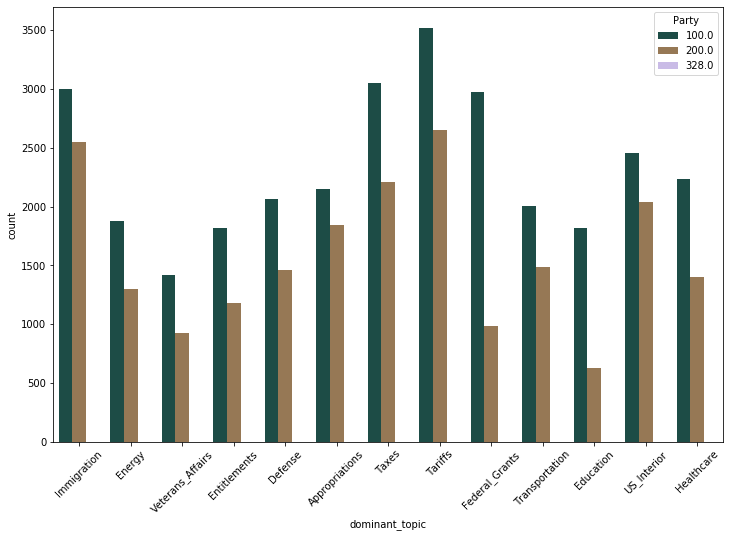

In [27]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(x='dominant_topic', hue='Party', data=df, palette='cubehelix')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Immigration', 'Energy', 'Veterans_Affairs', 'Entitlements', 'Defense', 'Appropriations', 'Taxes', 'Tariffs', 'Federal_Grants',  'Transportation', 'Education', 'US_Interior', 'Healthcare'], rotation = 45)
plt.show()